In [2]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Revise
using Interpolations
using Roots
using ColorSchemes
using Colors
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/rmg_K.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/rmg_3pV.jl")

rmg_inf_layer_alpha (generic function with 1 method)

In [3]:
function find_intersections(x1, y1, x2, y2)
    # Create interpolants (use linear or cubic splines)
    itp1 = LinearInterpolation(x1, y1)
    itp2 = LinearInterpolation(x2, y2)

    # Define the function whose roots we seek: f(x) = y1(x) - y2(x)
    function diff(x)
        return itp1(x) - itp2(x)
    end

    # Find the common x-range
    x_min = max(minimum(x1), minimum(x2))
    x_max = min(maximum(x1), maximum(x2))

    # Find roots in the common range
    intersections = find_zeros(diff, x_min, x_max)

    # Get corresponding y values
    intersection_points = Array{Float64}(undef, length(intersections), 2)
    for j in 1:length(intersections)
        x = intersections[j]
        intersection_points[j, 1] = x
        intersection_points[j, 2] = itp1(x)
    end

    return intersection_points
end

find_intersections (generic function with 1 method)

In [4]:
# general parameters
pd = 50
mbz_kappa = 1
w = 10^(-1) * mbz_kappa
omega = exp(im * 2 * pi / 3)

-0.4999999999999998 + 0.8660254037844387im

In [5]:
function explicit_og_bc_vF(delta, alpha, index, vF)
    omega = exp(im * 2 * pi/ 3)
    k = index - 1
    v = vF
    
    nmz = 16 * real(omega^k * delta)^4 + 3 * abs(delta)^4 + 8 * real(delta^3) * real(omega^k * delta)
    
    return ((8 * sqrt(3) / nmz^2) * (8 * v * real(omega^k * delta)^3 - 12 * real(alpha * conj(delta)) * real(omega^k * delta)^2 + 
    3 * abs2(delta) * real(alpha * conj(delta)) + v * real(delta^3)) * (4 * real(omega^k * delta)^2 * imag(alpha * conj(delta)) + 
    4 * real(omega^k * delta) * imag(alpha * delta^2) - v * imag(delta^3) + abs2(delta) * imag(alpha * conj(delta))))
    
end

explicit_og_bc_vF (generic function with 1 method)

In [6]:
function anal_inf_origin(kappa, vF, nu, layer, g)
    l = layer - 1
    term1 = (2 * l) / (3 * g * (1 - kappa^2 * nu^2))
    term2 = (-l/kappa * g + nu^2 * (1 + l) * g + vF/kappa * (kappa * nu)^(-2 * l))
    return term1 * term2
end

anal_inf_origin (generic function with 1 method)

In [10]:
function inf_rmg_origin_layers(m_kappa, vF, nu_list, w, pd)
    l_pts = 2
    l_list = range(0, l_pts, l_pts)
    curvatures = Array{Float64}(undef, 4, l_pts)
    spacing = 10^(-2) * (w / 2 / pd)

    P = Figure(size=(1800, 2000), fontsize=30)

    for j in 1:length(nu_list)
        nu = nu_list[j]
        for i in 1:l_pts
            g = -1
            delta = rmg_inf_layer_delta(m_kappa, nu, i, g)
            alpha = rmg_inf_layer_alpha(m_kappa, nu, i, g)
            grid = reshape([10^(-16), 10^(-16)], (1, 2))
            # curvatures[1, i] = rmg_patch_bc(grid, spacing, NL, nu, m_kappa, vF, delta, alpha)[1]
            # curvatures[2, i] = rmg_equal_weighted_sum_bc(grid, spacing, NL, nu, m_kappa)[1]
            curvatures[3, i] = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]
            curvatures[2, i] = anal_inf_origin(m_kappa, vF, nu, i, g)
        end

        ax1 = Axis(P[j, 1], title = "nu = "*string(nu), xlabel = L"\ell", ylabel = L"\Omega")
        # lines!(ax1, l_list, curvatures[1, :], label = "3-Patch")
        lines!(ax1, l_list, curvatures[2, :], label = "Analytic")
        lines!(ax1, l_list, curvatures[3, :], label = "Pure 3-patch")
        P[j, 2] = Legend(P, ax1, framevisible = true)
    end
    axs1 = Axis(P[:, 1], title = L"\text{RMG } \Omega (0, 0)", titlegap = 100, titlesize = 80)
    hidedecorations!(axs1, label = false)
    hidespines!(axs1)

    P
end

inf_rmg_origin_layers (generic function with 1 method)

In [11]:
vF = 0
nu_list = [0.1, 0.6, 0.8, 0.9]

4-element Vector{Float64}:
 0.1
 0.6
 0.8
 0.9

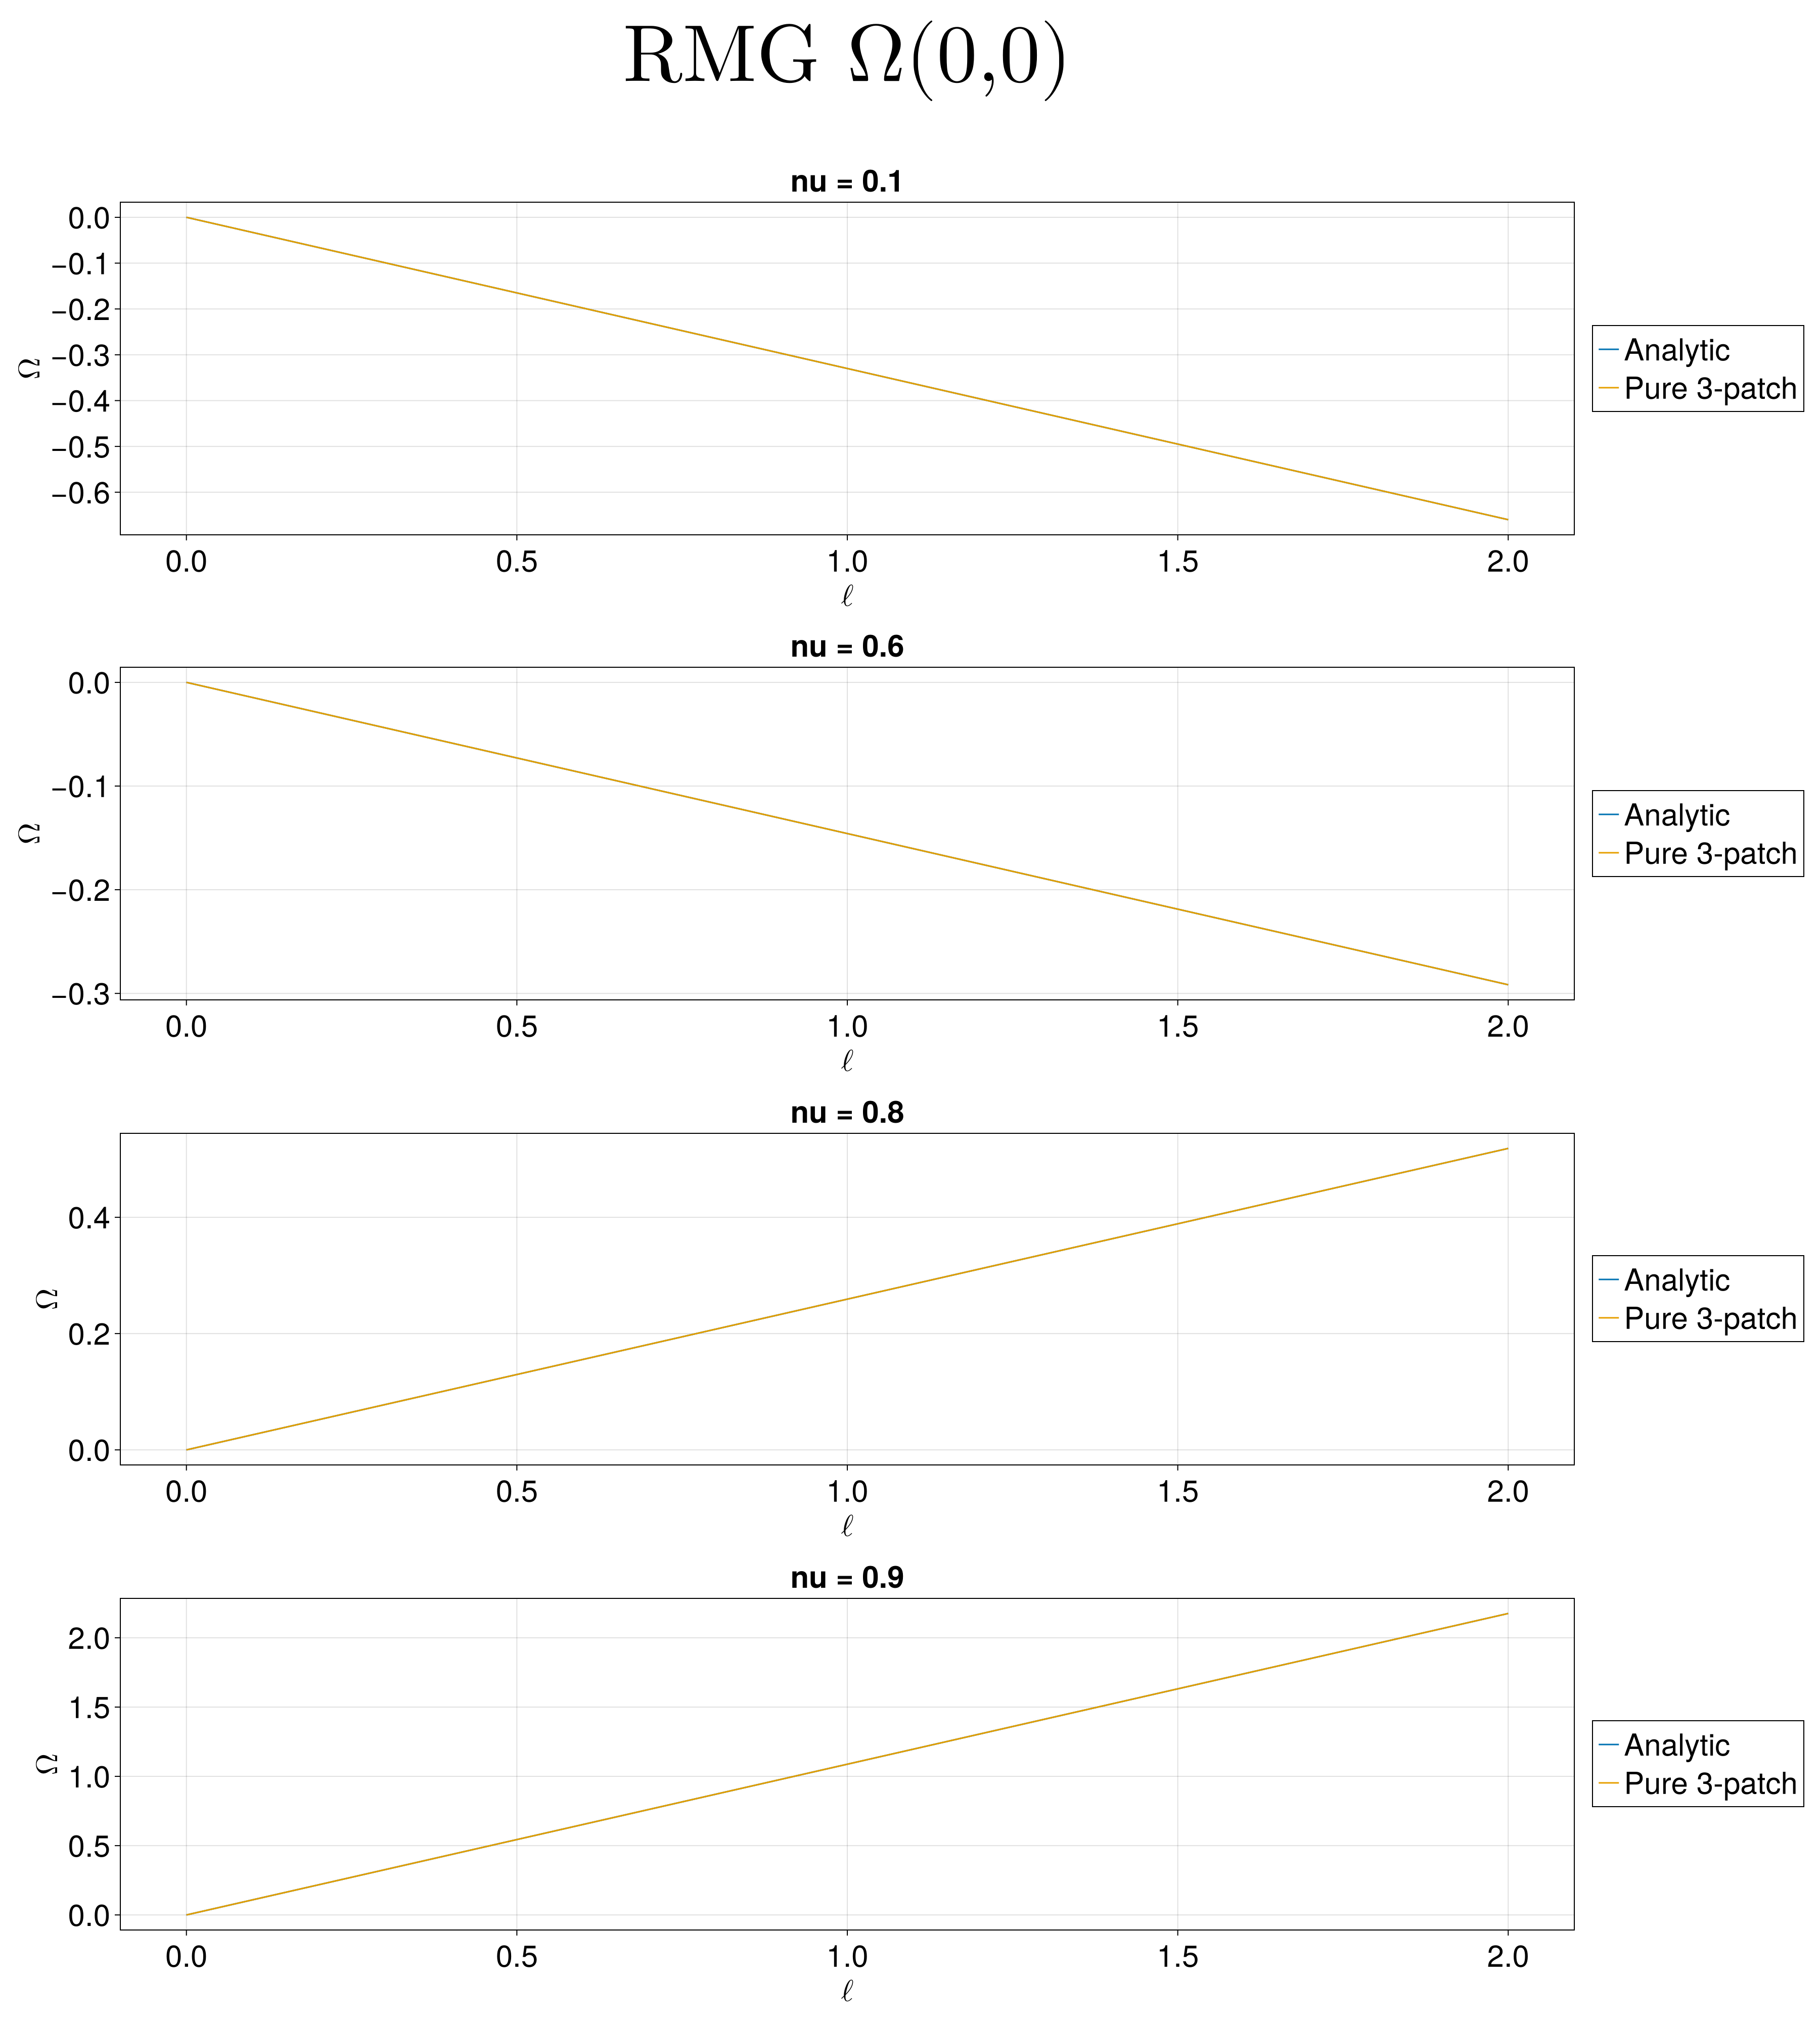

In [12]:
inf_rmg_origin_layers(mbz_kappa, vF, nu_list, w, pd)